In [1]:
# CHEATSHEET --> https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
from sklearn import preprocessing
import folium as folium
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, PoissonRegressor, BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
# Prune data
data = pd.read_csv("NYPD_Arrests_Data__Historic_.csv", parse_dates=["ARREST_DATE"])
data = data[["ARREST_DATE", "OFNS_DESC"]]
data = data.dropna(subset=['OFNS_DESC'])
data["YEAR"] = pd.DatetimeIndex(data['ARREST_DATE']).year
data["MONTH"] = pd.DatetimeIndex(data['ARREST_DATE']).month

# Remove empty fields, none are empty in this case
data.dropna(inplace=True)

In [3]:
def get_offence_data(data, offence):
    return data.loc[data['OFNS_DESC'] == offence]

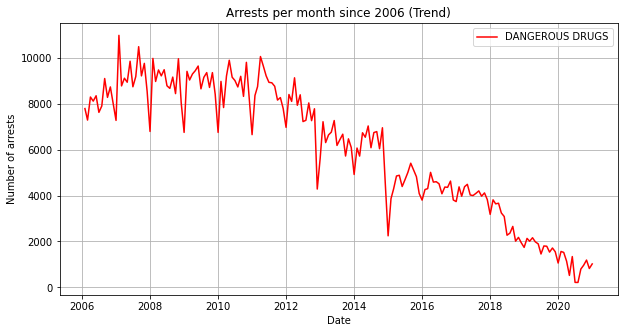

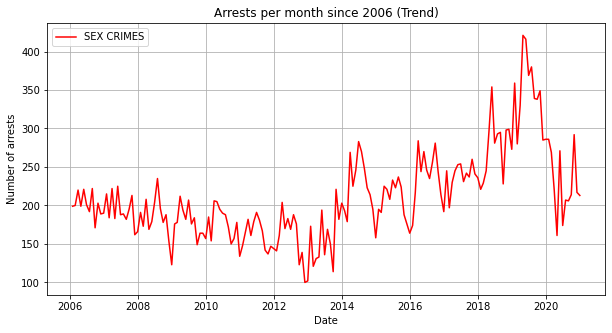

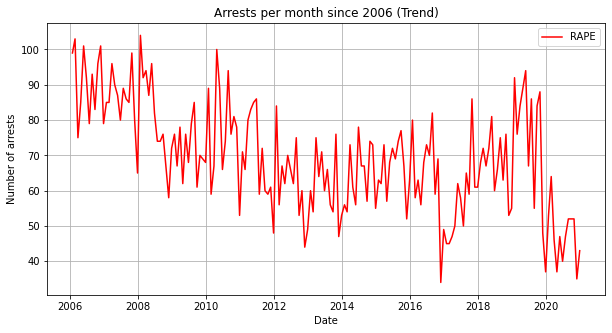

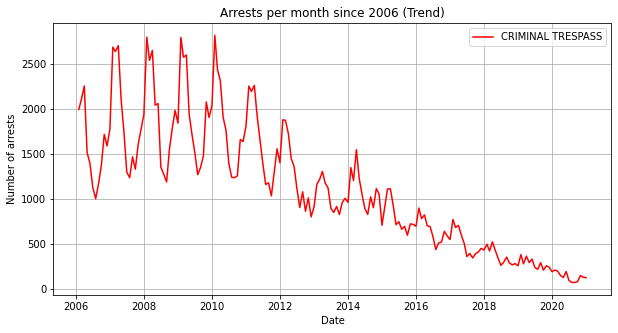

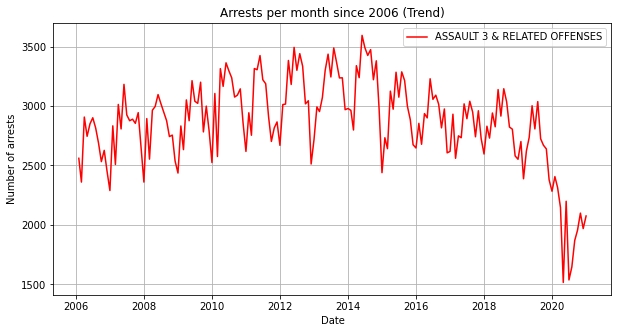

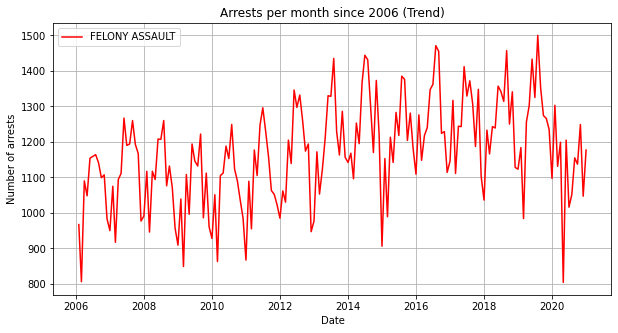

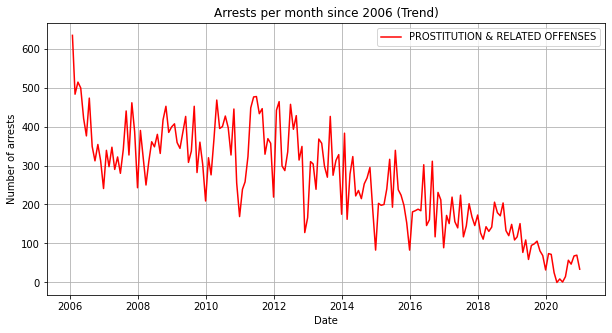

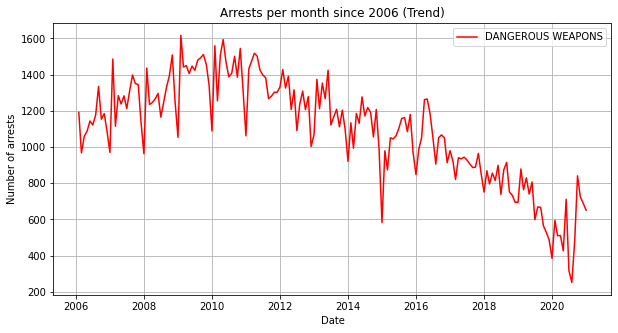

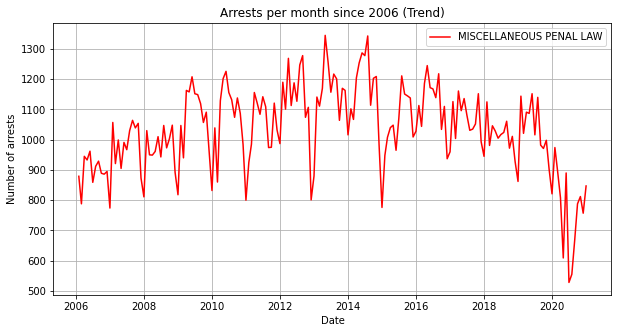

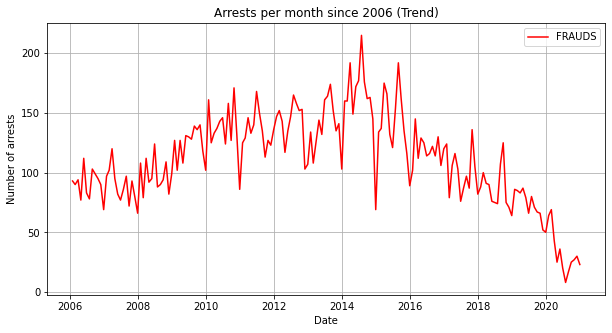

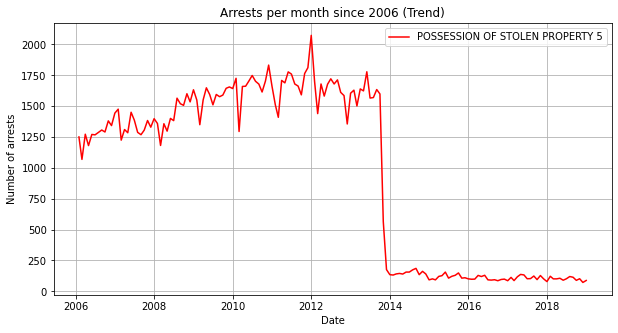

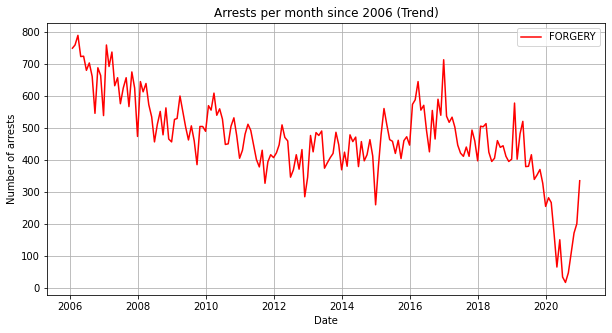

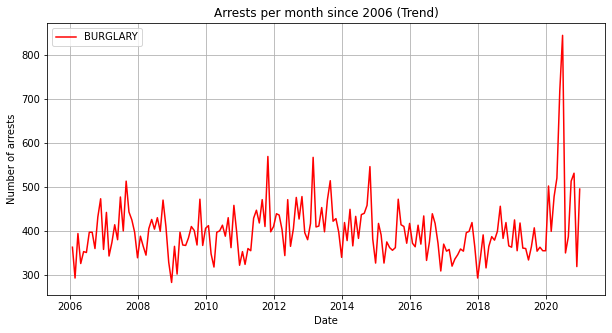

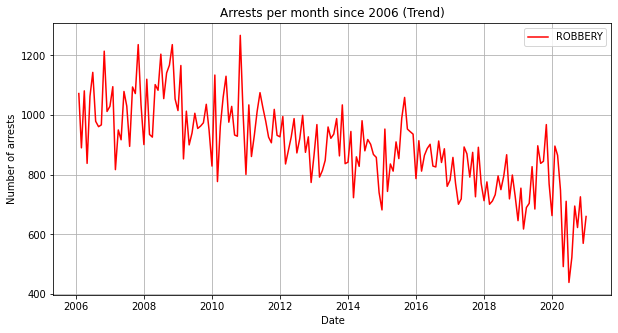

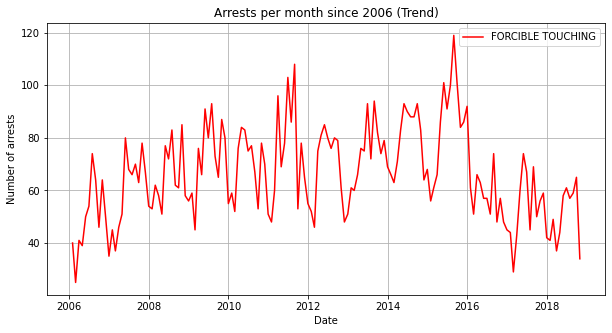

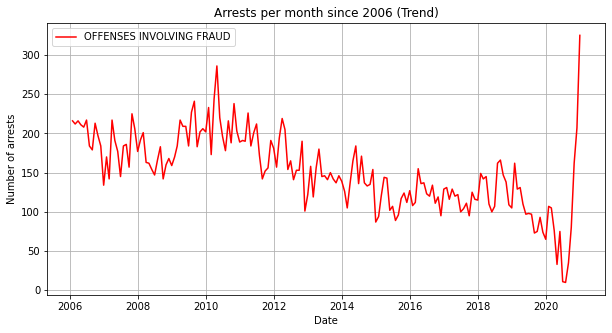

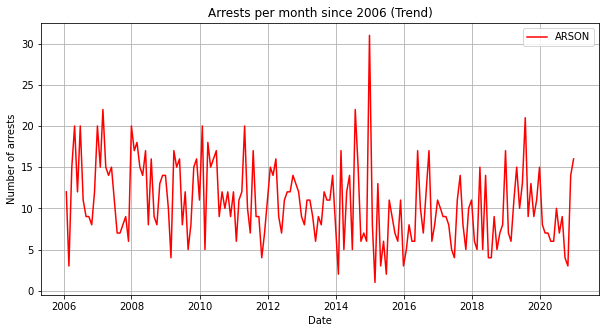

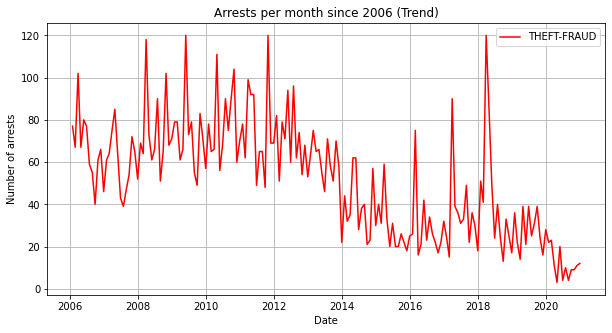

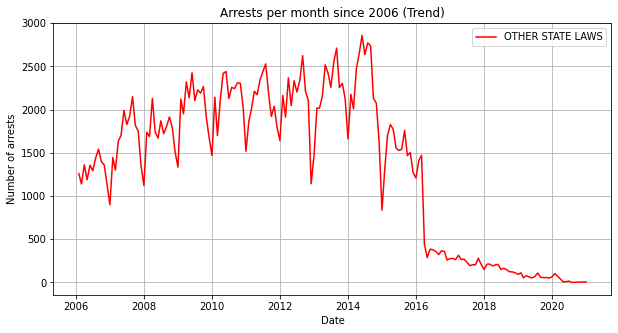

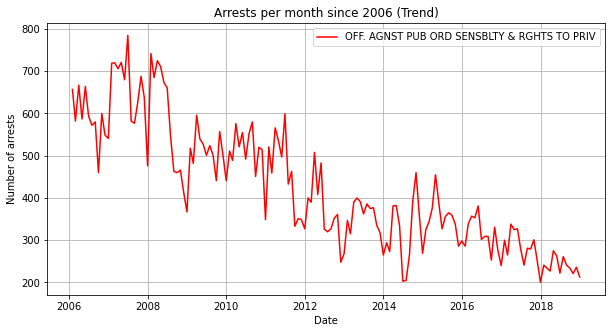

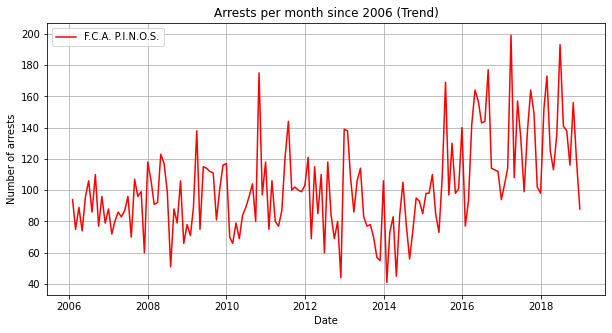

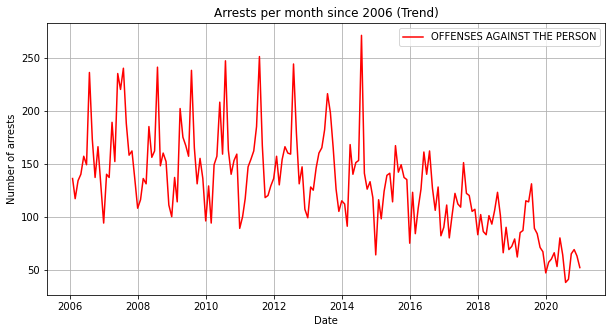

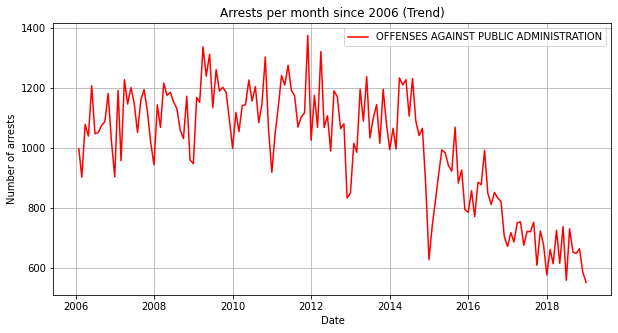

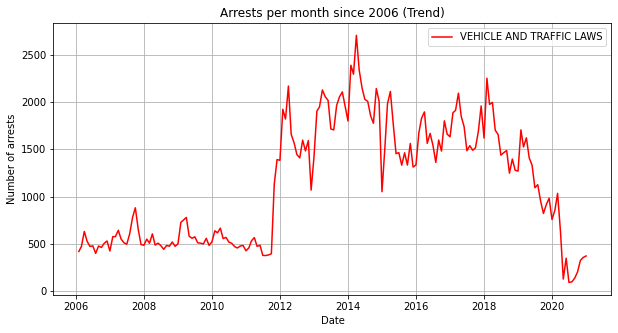

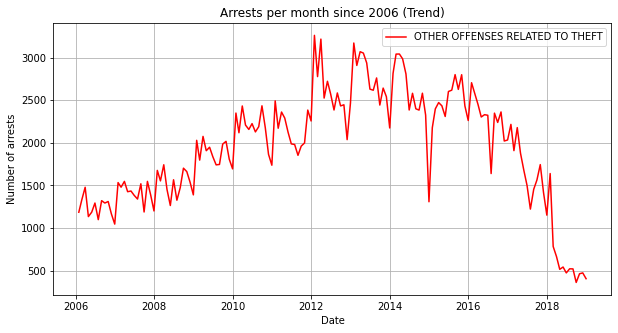

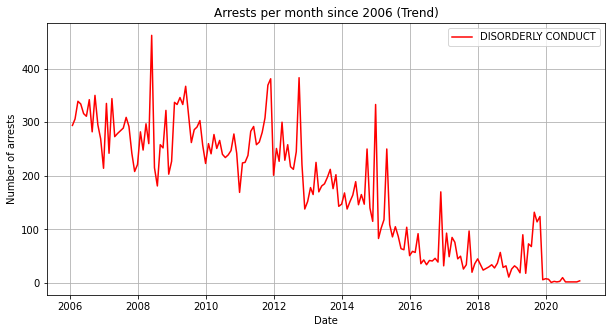

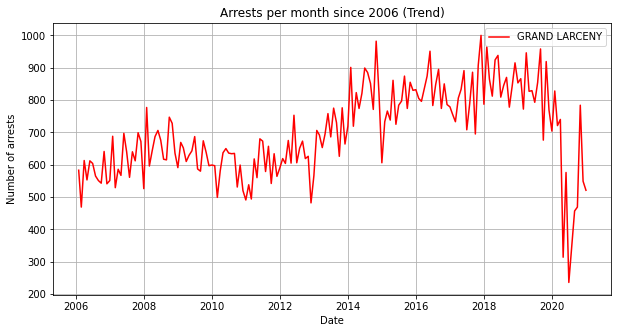

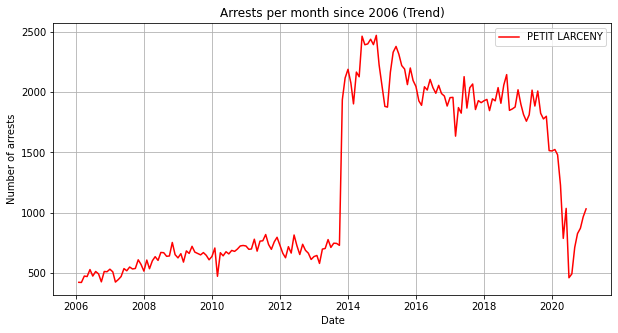

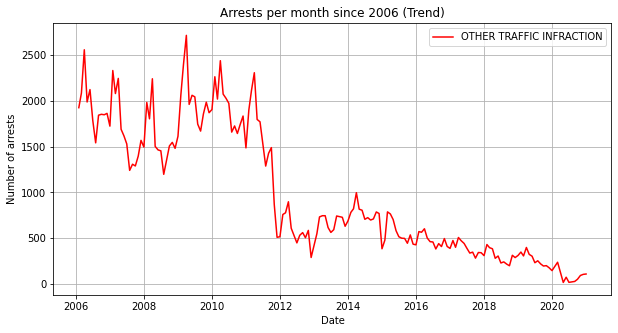

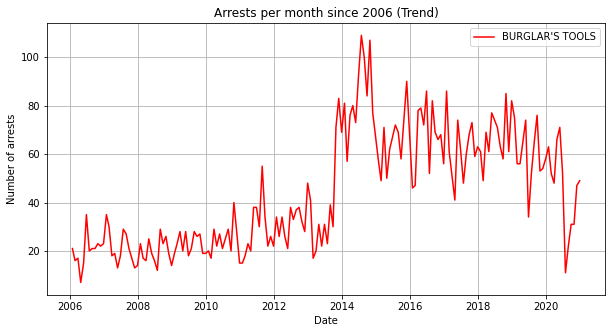

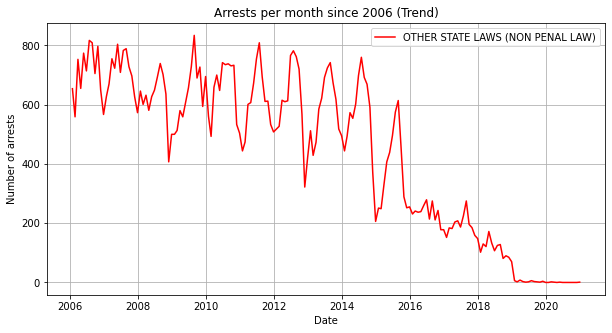

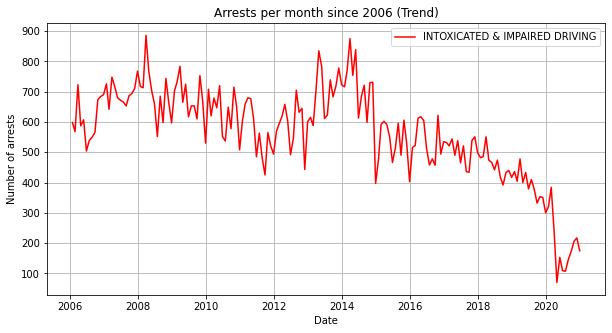

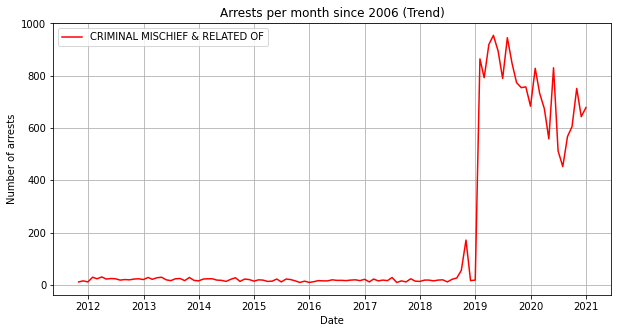

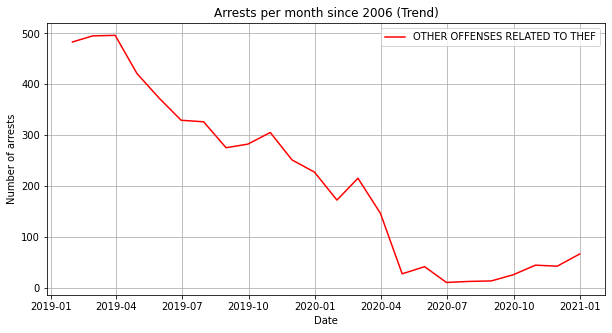

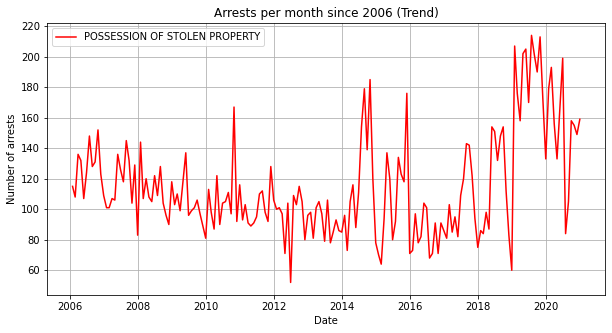

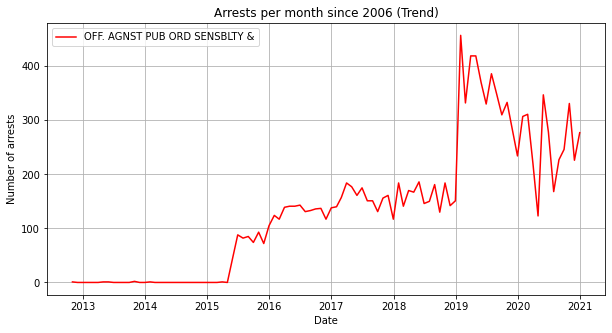

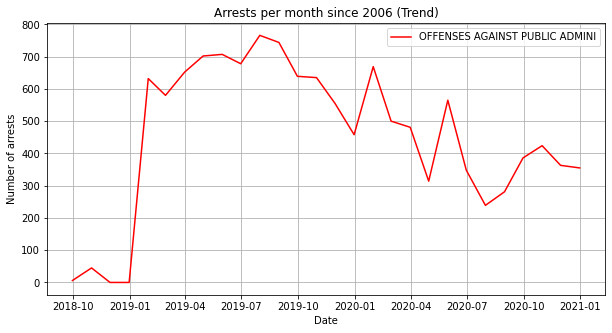

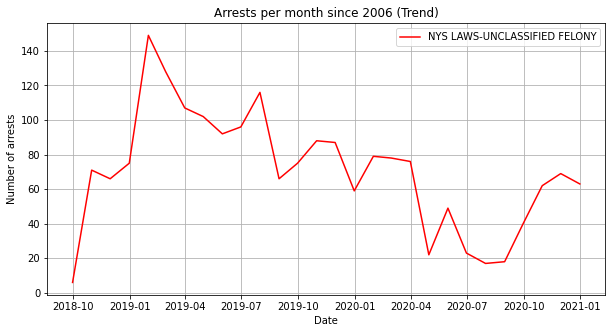

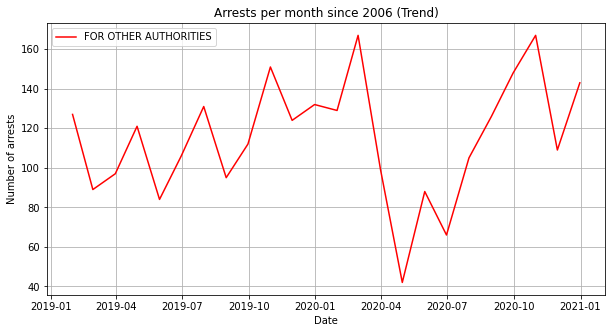

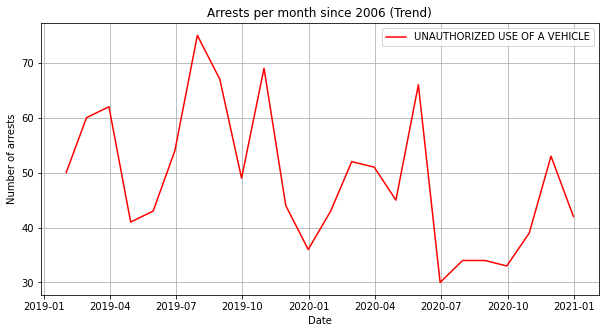

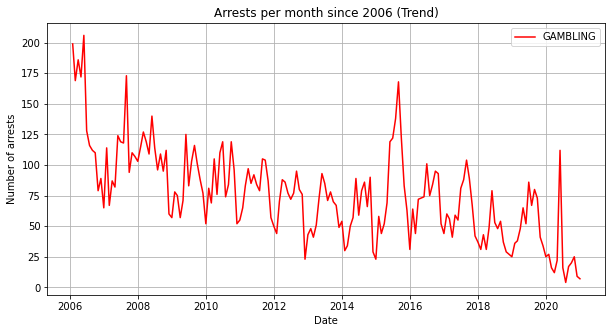

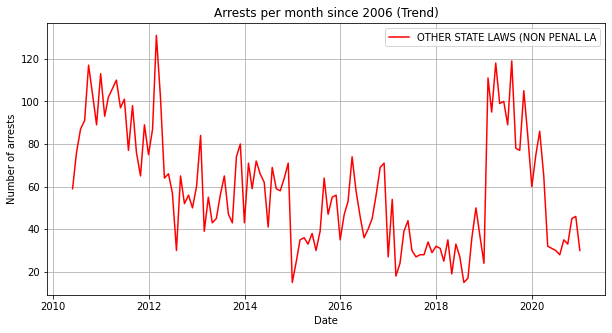

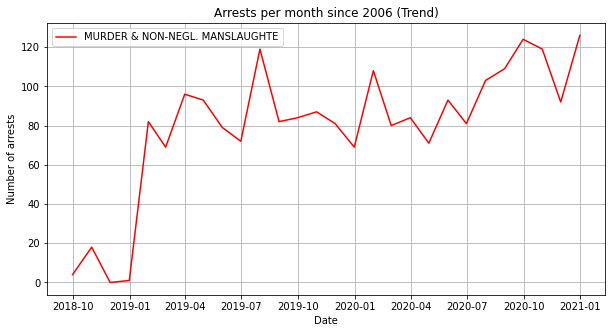

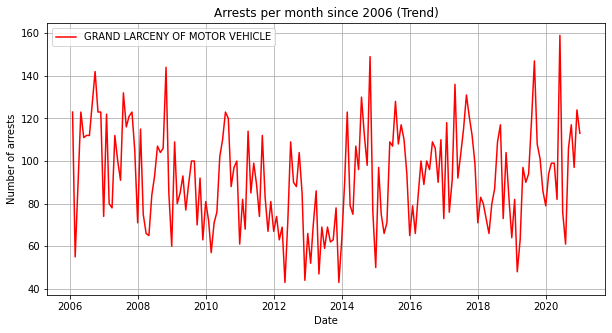

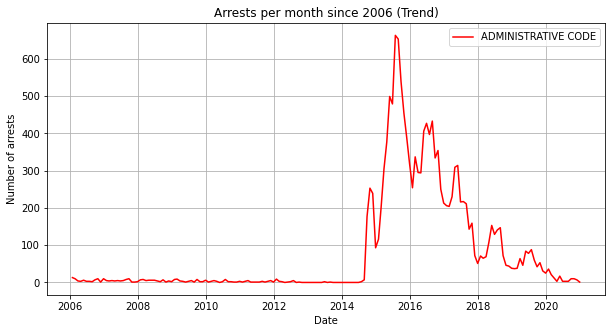

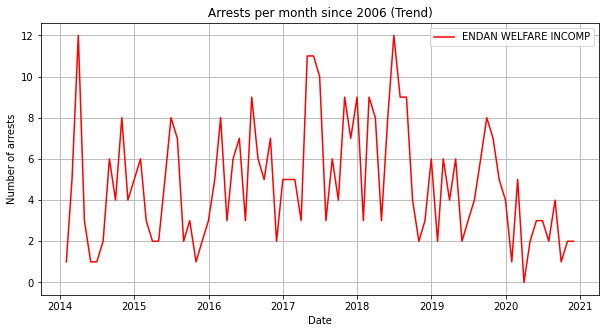

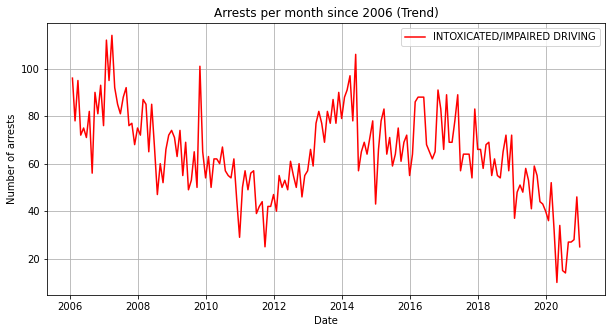

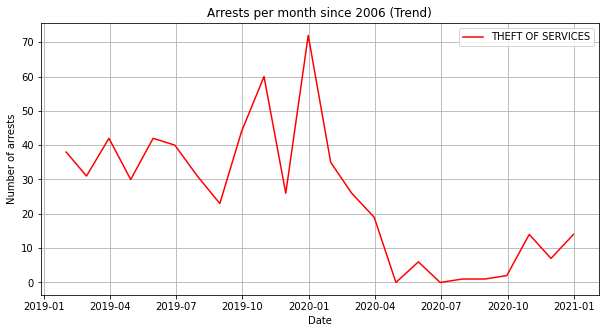

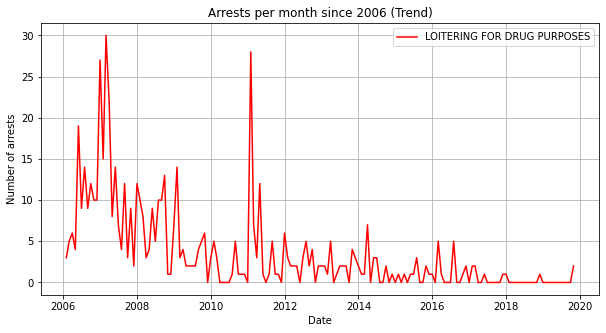

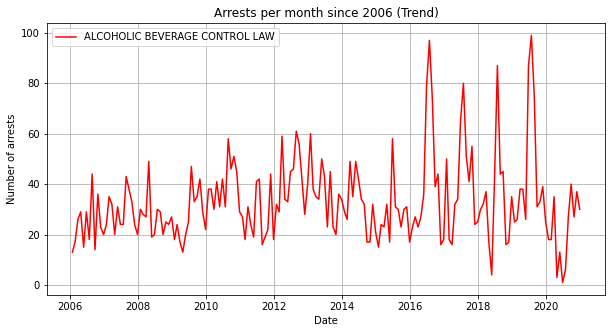

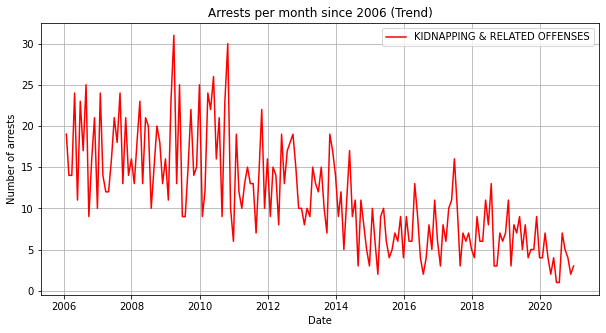

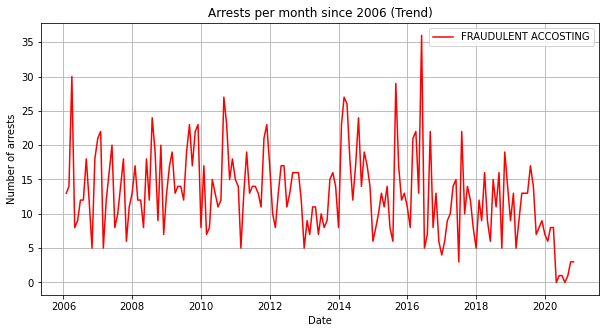

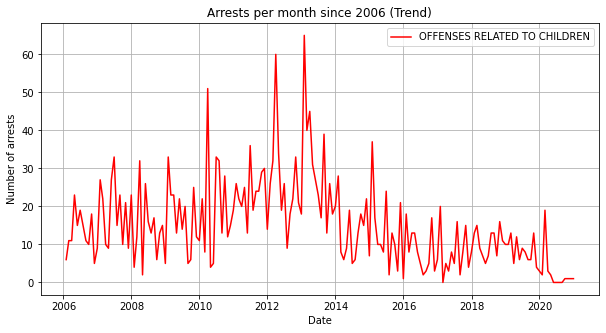

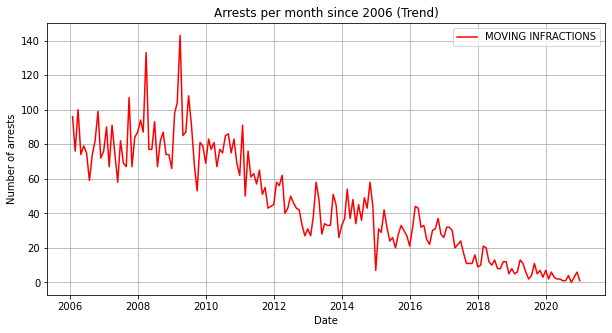

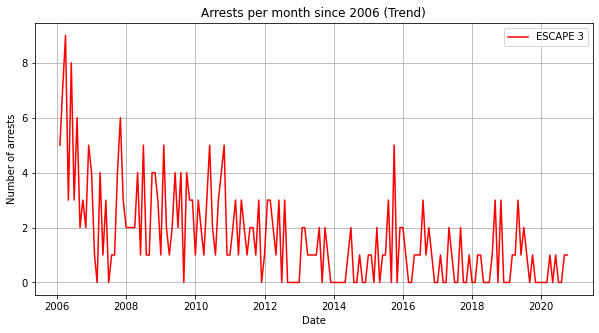

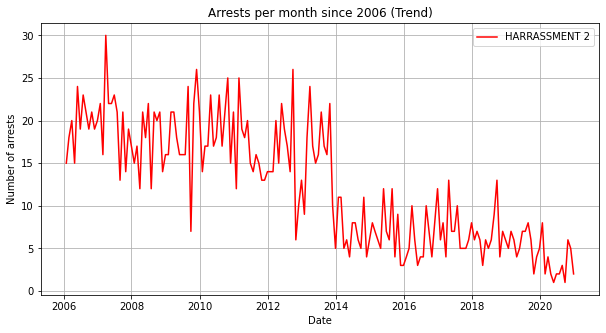

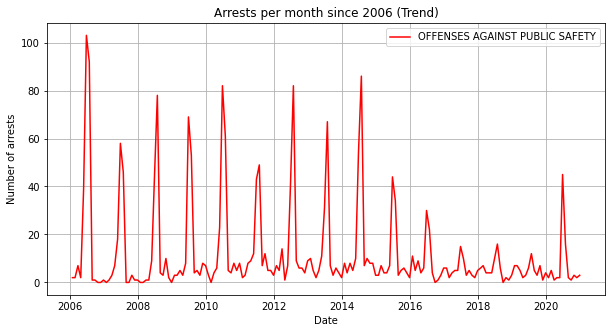

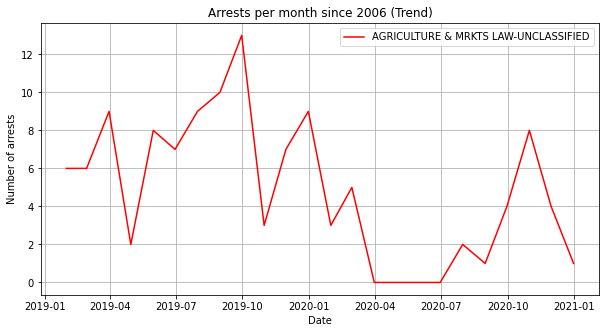

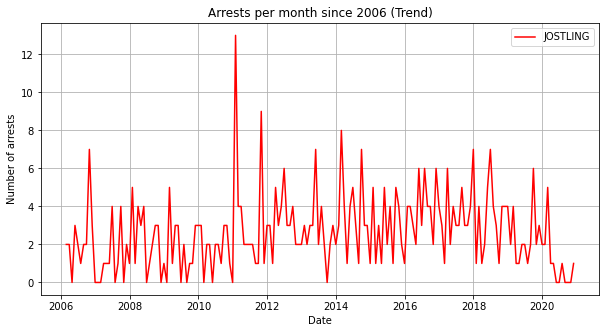

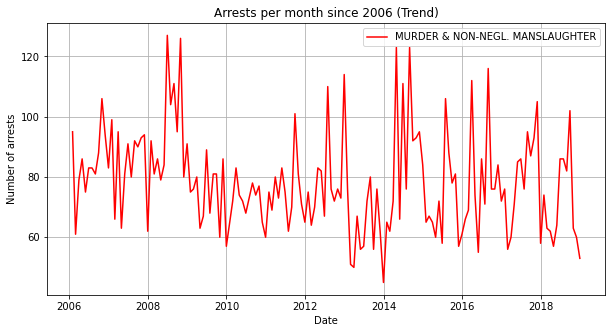

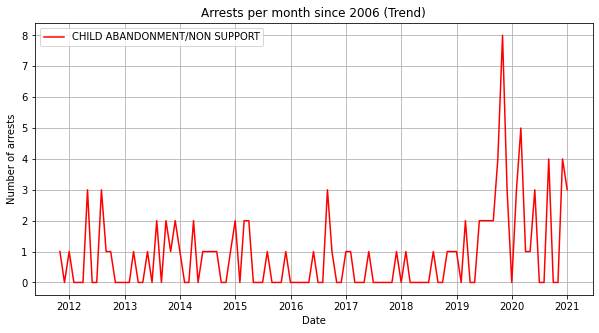

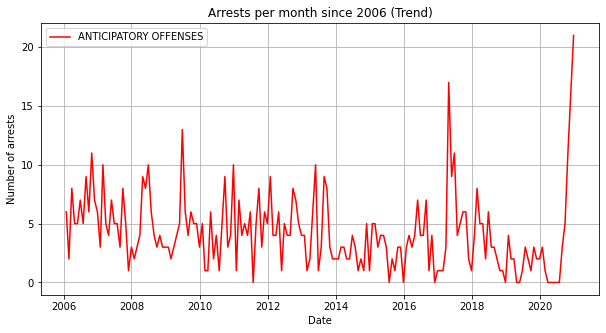

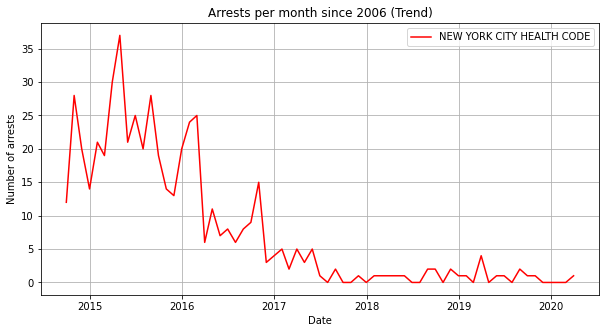

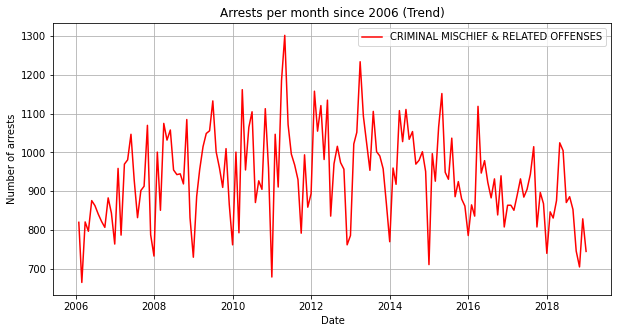

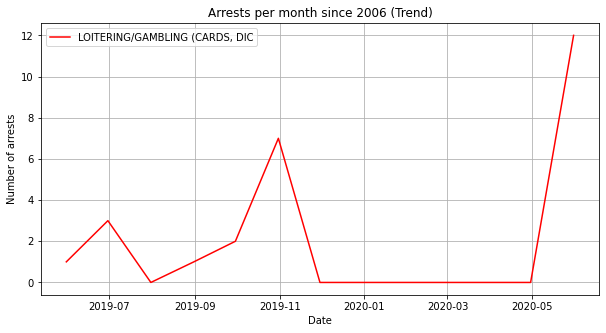

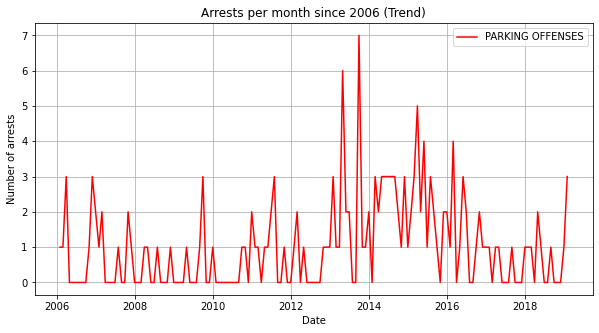

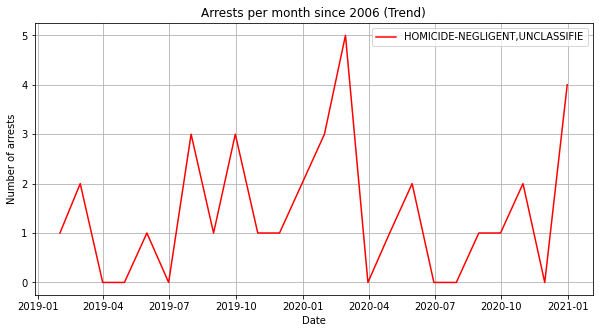

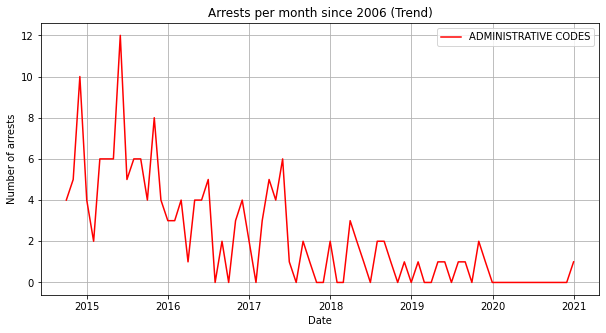

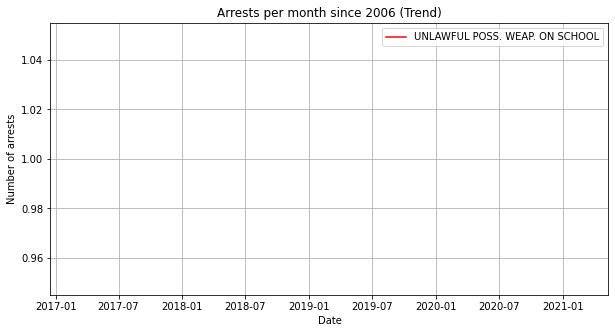

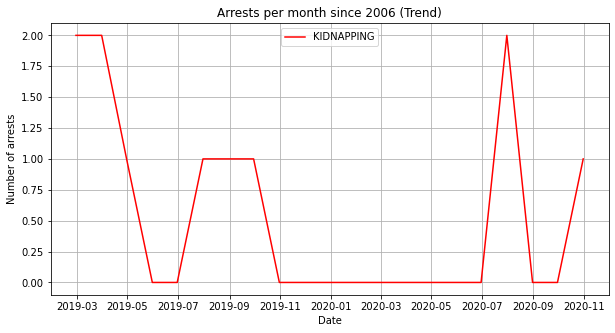

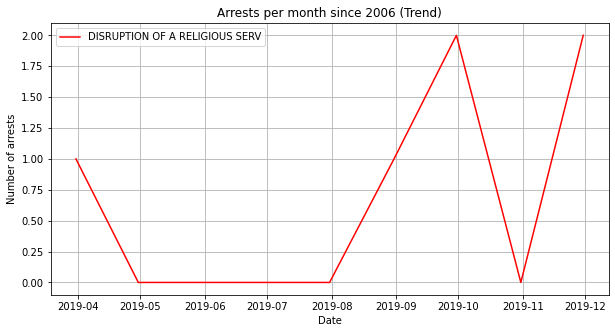

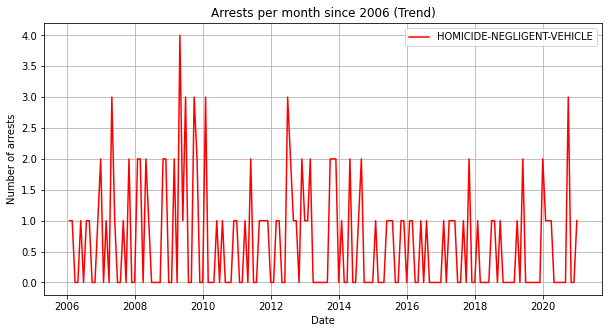

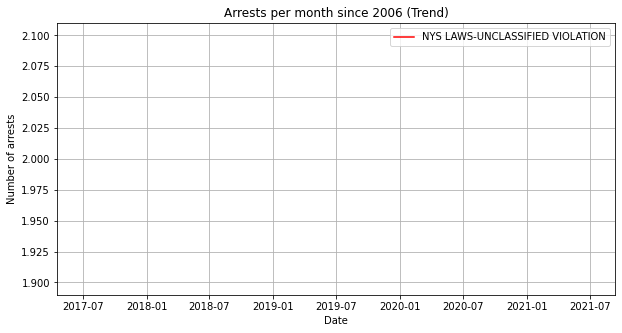

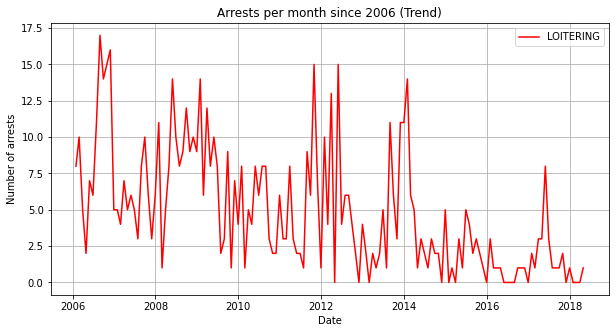

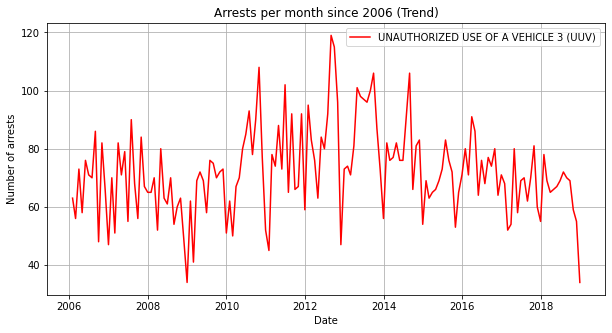

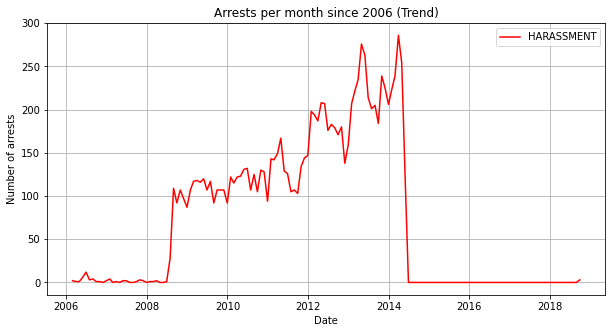

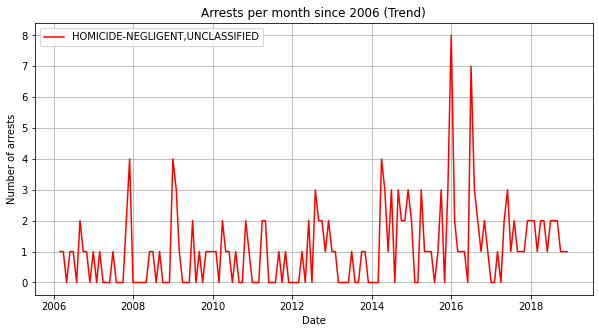

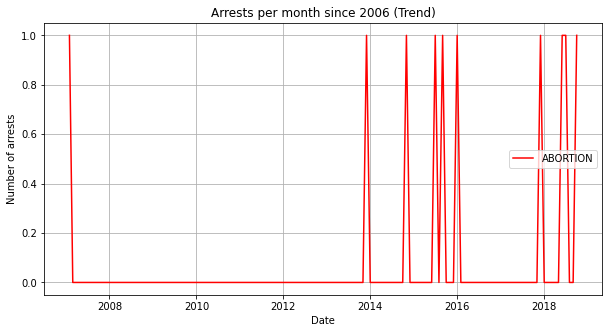

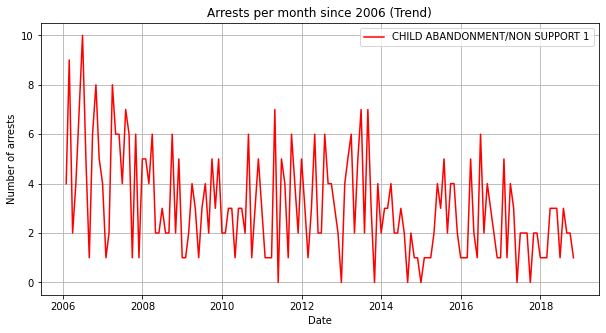

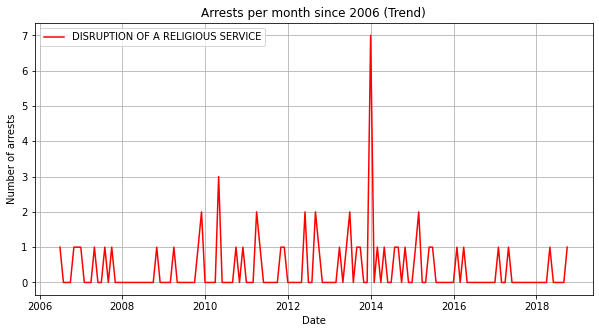

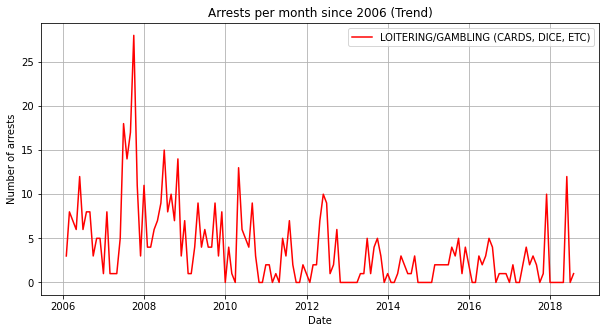

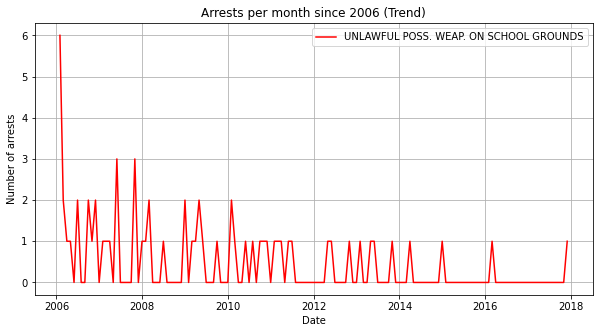

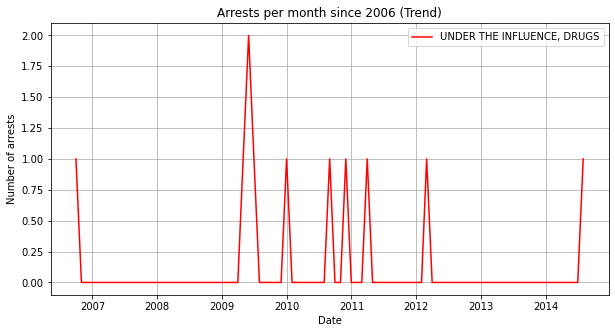

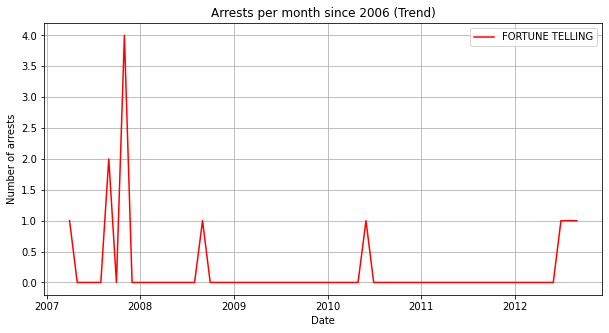

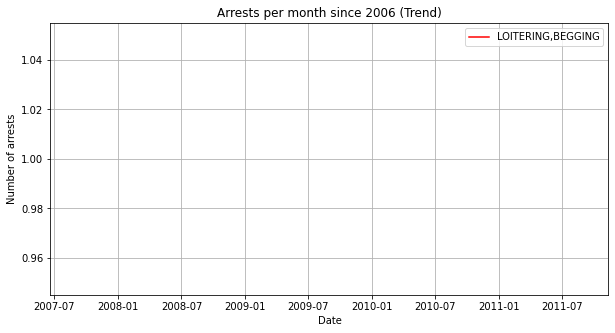

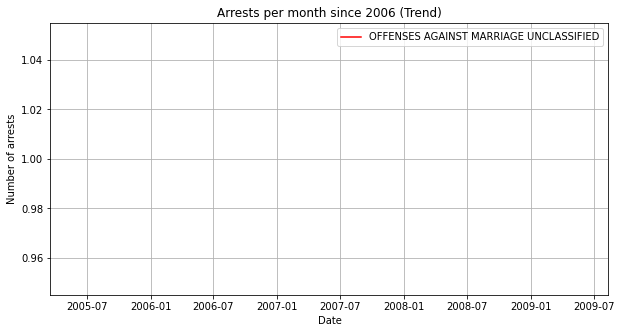

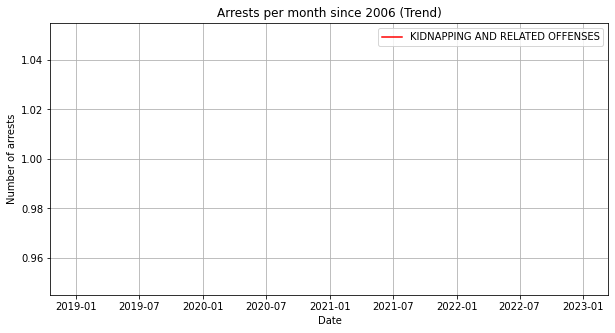

In [4]:
offense_descriptions = data.OFNS_DESC.unique()
all_data = []
for offense_description in offense_descriptions:
    # Get different offense data
    data_offense = get_offence_data(data, offense_description)
    all_data.append(data_offense)
    # Show trend for drugs, robbery and assault since 2006

for index, category in enumerate(all_data):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    ax.plot(category.groupby(pd.Grouper(key='ARREST_DATE', freq='M')).size(), color="red")    
    ax.legend([offense_descriptions[index]])
    ax.set(xlabel='Date', ylabel='Number of arrests', title='Arrests per month since 2006 (Trend)')
    ax.grid()
    #fig.savefig("offense_descriptions_all.png")
    plt.show()

    

In [8]:

data_group = data.groupby(["YEAR", "MONTH"])
x = []
y = []
print(data_group.size())
for i, count in enumerate(data_group.size()):
    x.append(i)
    y.append(count)
    print(str(i)+";"+str(count))


YEAR  MONTH
2006  1        31151
      2        28957
      3        34010
      4        30629
      5        32367
               ...  
2020  8         9827
      9        11300
      10       13025
      11       11461
      12       12540
Length: 180, dtype: int64
0;31151
1;28957
2;34010
3;30629
4;32367
5;30531
6;30448
7;32244
8;30455
9;32826
10;30299
11;27943
12;37673
13;32211
14;35664
15;33293
16;35594
17;32806
18;32665
19;35777
20;33211
21;35107
22;31392
23;27785
24;36816
25;33148
26;36518
27;33991
28;34653
29;33121
30;32298
31;32901
32;32959
33;35760
34;30706
35;28501
36;36911
37;34866
38;38434
39;35710
40;37221
41;34775
42;34974
43;35267
44;33888
45;36297
46;32966
47;29749
48;37405
49;31682
50;37777
51;37751
52;37393
53;35976
54;35111
55;35337
56;34075
57;37661
58;33257
59;28256
60;34153
61;34100
62;38735
63;37146
64;36810
65;35667
66;34655
67;33268
68;31012
69;33181
70;32774
71;30630
72;36362
73;34314
74;38549
75;33554
76;35927
77;32435
78;33358
79;35346
80;32161
81;32876
82;

In [10]:
data_without_drugs = data.loc[data['OFNS_DESC'] != "DANGEROUS DRUGS"]
data_group = data_without_drugs.groupby(["YEAR", "MONTH"])
x = []
y = []
print(data_group.size())
for i, count in enumerate(data_group.size()):
    x.append(i)
    y.append(count)
    print(str(i)+";"+str(count))

YEAR  MONTH
2006  1        23362
      2        21669
      3        25717
      4        22515
      5        24019
               ...  
2020  8         9031
      9        10338
      10       11838
      11       10641
      12       11521
Length: 180, dtype: int64
0;23362
1;21669
2;25717
3;22515
4;24019
5;22907
6;22546
7;23145
8;22178
9;24094
10;22297
11;20669
12;26693
13;23433
14;26552
15;24356
16;25742
17;24067
18;23480
19;25291
20;23997
21;25348
22;22854
23;20992
24;26841
25;24177
26;27046
27;24776
28;25170
29;24339
30;23629
31;23740
32;24518
33;25800
34;22668
35;21750
36;27500
37;25831
38;29137
39;26270
40;27578
41;26126
42;25823
43;25910
44;25178
45;26941
46;24556
47;22998
48;28432
49;23848
50;28573
51;27856
52;28237
53;26965
54;26380
55;26142
56;25754
57;27857
58;25031
59;21603
60;25792
61;25352
62;28678
63;27492
64;27593
65;26735
66;25741
67;24507
68;22853
69;24913
70;24981
71;23659
72;27960
73;26211
74;29419
75;25621
76;27538
77;25212
78;26080
79;27311
80;24898
81;25095
82;